# TOBACCO USE PREVALENCE IN UNITED STATES

In [144]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn import preprocessing

#Reading the dataset
df = pd.read_csv("Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present__20240201.csv")
df.head(3)

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2017,GU,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,BRFSS,NaN,%,Percentage,...,"(13.444304, 144.793731)",BEH,100BEH,110CSA,2GEN,8AGE,6RAC,6EDU,BRF21,21
1,2018,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Current,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF27,27
2,2017,US,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,BRFSS,Never,%,Percentage,...,NaN,BEH,100BEH,165SSA,1GEN,8AGE,6RAC,6EDU,BRF28,28


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43341 entries, 0 to 43340
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        43341 non-null  object 
 1   LocationAbbr                43341 non-null  object 
 2   LocationDesc                43341 non-null  object 
 3   TopicType                   43341 non-null  object 
 4   TopicDesc                   43341 non-null  object 
 5   MeasureDesc                 43341 non-null  object 
 6   DataSource                  43341 non-null  object 
 7   Response                    15018 non-null  object 
 8   Data_Value_Unit             43341 non-null  object 
 9   Data_Value_Type             43341 non-null  object 
 10  Data_Value                  41224 non-null  float64
 11  Data_Value_Footnote_Symbol  2117 non-null   object 
 12  Data_Value_Footnote         2117 non-null   object 
 13  Data_Value_Std_Err          411

In [146]:
df.shape

(43341, 31)

In [147]:
df.describe()

,Data_Value,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,DisplayOrder
count,41224.000000,41146.000000,41146.000000,41146.000000,41146.000000,43341.000000
mean,25.355041,1.710589,22.010864,28.679347,3050.171171,47.079278
std,25.002587,1.715646,24.135141,26.209196,3798.872768,24.494487
min,0.000000,0.000000,0.000000,0.000000,50.000000,5.000000
25%,5.100000,0.600000,3.200000,6.900000,480.000000,24.000000
50%,17.100000,1.100000,14.300000,19.800000,1798.000000,51.000000
75%,38.900000,2.200000,30.500000,47.400000,4203.000000,71.000000
max,99.900000,16.600000,99.800000,100.000000,40726.000000,81.000000


In [148]:
df.columns

Index(['YEAR', 'LocationAbbr', 'LocationDesc', 'TopicType', 'TopicDesc',
       'MeasureDesc', 'DataSource', 'Response', 'Data_Value_Unit',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender', 'Race', 'Age',
       'Education', 'GeoLocation', 'TopicTypeId', 'TopicId', 'MeasureId',
       'StratificationID1', 'StratificationID2', 'StratificationID3',
       'StratificationID4', 'SubMeasureID', 'DisplayOrder'],
      dtype='object')

In [149]:
# Select relevant columns/features
selected_features = ['YEAR', 'LocationDesc', 'TopicType','TopicDesc', 'MeasureDesc',
                     'Data_Value', 'Sample_Size', 'Gender', 'Race', 'Age', 'Education'
                    ,'Data_Value_Std_Err','Low_Confidence_Limit', 'High_Confidence_Limit','DisplayOrder']

# Create a subset of the dataframe with selected features
selected_df = df[selected_features].copy()

selected_df.head(4)

,YEAR,LocationDesc,TopicType,TopicDesc,MeasureDesc,Data_Value,Sample_Size,Gender,Race,Age,Education,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,DisplayOrder
0,2017,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,30.0,692.0,Male,All Races,All Ages,All Grades,2.3,25.4,34.6,21
1,2018,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,16.1,NaN,Overall,All Races,All Ages,All Grades,NaN,NaN,NaN,27
2,2017,National Median (States and DC),Tobacco Use – Survey Data,Cigarette Use (Adults),Smoking Status,58.2,NaN,Overall,All Races,All Ages,All Grades,NaN,NaN,NaN,28
3,2016,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,0.5,123.0,Overall,Hispanic,All Ages,All Grades,0.4,0.0,1.2,69


In [150]:
# Check for missing values
missing_values = selected_df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 YEAR                        0
LocationDesc                0
TopicType                   0
TopicDesc                   0
MeasureDesc                 0
Data_Value               2117
Sample_Size              2195
Gender                      0
Race                        0
Age                         0
Education                   0
Data_Value_Std_Err       2195
Low_Confidence_Limit     2195
High_Confidence_Limit    2195
DisplayOrder                0
dtype: int64


In [151]:
# Drop rows with missing values in Data_Value and Sample_Size columns
cleaned_data = selected_df.dropna(subset=['Data_Value', 'Sample_Size', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
                                         'High_Confidence_Limit'])

# Check for missing values again
missing_values_after = cleaned_data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 YEAR                     0
LocationDesc             0
TopicType                0
TopicDesc                0
MeasureDesc              0
Data_Value               0
Sample_Size              0
Gender                   0
Race                     0
Age                      0
Education                0
Data_Value_Std_Err       0
Low_Confidence_Limit     0
High_Confidence_Limit    0
DisplayOrder             0
dtype: int64


In [152]:
print(type(cleaned_data))
print(cleaned_data.shape)


<class 'pandas.core.frame.DataFrame'>
(41146, 15)


In [153]:
# Group the cleaned data by "YEAR"
grouped_years = cleaned_data.groupby("YEAR")

# Extract the unique years from the grouped data
unique_years = list(grouped_years.groups.keys())
print("Unique years:", unique_years)



Unique years: ['2011', '2011-2012', '2012', '2012-2013', '2013', '2013-2014', '2014', '2014-2015', '2015', '2015-2016', '2016', '2016-2017', '2017', '2017-2018', '2018', '2018-2019', '2019']


In [154]:
# Extract end years from year ranges
cleaned_data.loc[:, 'YEAR'] = cleaned_data['YEAR'].str.split('-').str[-1]

#Display the years
print(cleaned_data['YEAR'].unique())

['2017' '2016' '2014' '2012' '2019' '2011' '2013' '2018' '2015']


C:\Users\jegod\AppData\Local\Temp\ipykernel_20232\3777670652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, 'YEAR'] = cleaned_data['YEAR'].str.split('-').str[-1]


In [155]:
print(cleaned_data['Gender'].unique())

['Male' 'Overall' 'Female']


In [156]:
print(cleaned_data['Gender'].value_counts())

Overall    26777
Female      7411
Male        6958
Name: Gender, dtype: int64


In [157]:
#split the Overall values equally and pass each half to male and female

# Set seed for reproducibility
np.random.seed(42)

# Generate random binary values with a fixed seed
gender_col = np.random.choice([True, False], size=len(cleaned_data))

# Assign 'Male' to rows where gender_col is True and 'Female' otherwise
cleaned_data.loc[gender_col, 'Gender'] = 'Male'
cleaned_data.loc[~gender_col, 'Gender'] = 'Female'


In [158]:
print(cleaned_data['Gender'].value_counts())

Female    20634
Male      20512
Name: Gender, dtype: int64


In [ ]:
# Assuming your dataset is named 'cleaned_data' and you want to save it as 'cleaned_data.csv'
cleaned_data.to_csv('cleaned_data1.csv', index=False)


In [159]:
# Summary statistics for numerical columns
cleaned_data.describe().round()


,Data_Value,Sample_Size,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,DisplayOrder
count,41146.0,41146.0,41146.0,41146.0,41146.0,41146.0
mean,25.0,3050.0,2.0,22.0,29.0,46.0
std,25.0,3799.0,2.0,24.0,26.0,24.0
min,0.0,50.0,0.0,0.0,0.0,5.0
25%,5.0,480.0,1.0,3.0,7.0,24.0
50%,17.0,1798.0,1.0,14.0,20.0,45.0
75%,39.0,4203.0,2.0,30.0,47.0,70.0
max,100.0,40726.0,17.0,100.0,100.0,81.0


In [160]:
corr_data = cleaned_data.corr(numeric_only=True)


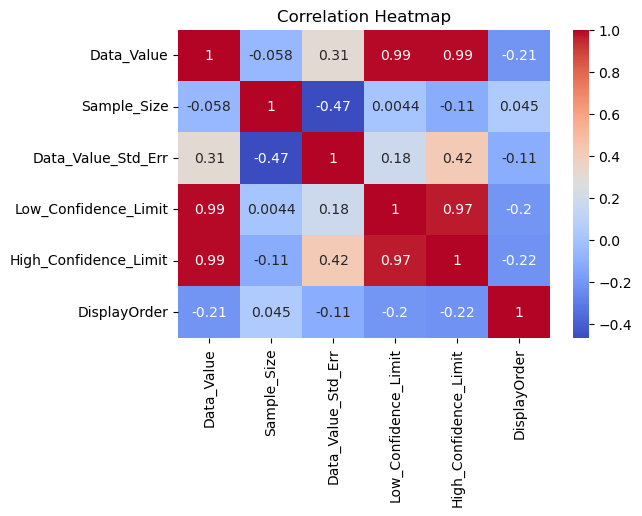

In [161]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap using imshow
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()


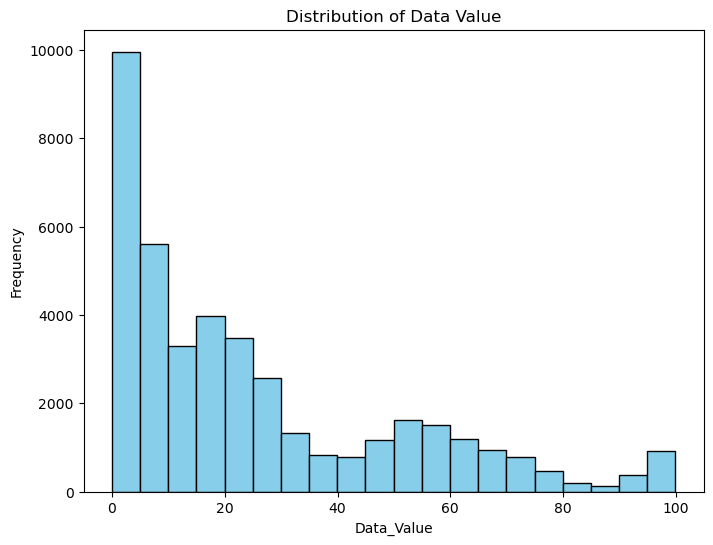

In [162]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create the histogram
plt.hist(cleaned_data['Data_Value'], bins=20, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Distribution of Data Value')
plt.xlabel('Data_Value')
plt.ylabel('Frequency')

plt.show()


In [163]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis
data_skewness = skew(cleaned_data['Data_Value'])
data_kurtosis = kurtosis(cleaned_data['Data_Value'])

print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)


Skewness: 1.176063180525662
Kurtosis: 0.5180684949238139


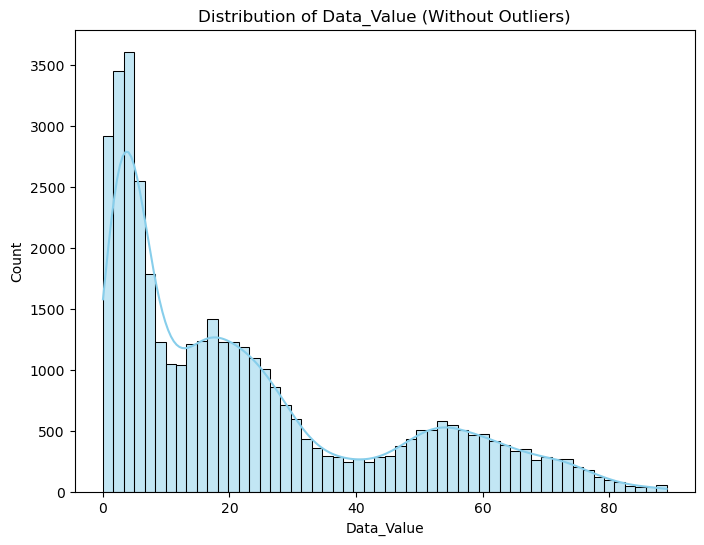

In [164]:
import numpy as np
import seaborn as sns

# Calculate Q1 and Q3
Q1 = cleaned_data['Data_Value'].quantile(0.25)
Q3 = cleaned_data['Data_Value'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
cleaned_data_no_outliers = cleaned_data[(cleaned_data['Data_Value'] >= lower_bound) & (cleaned_data['Data_Value'] <= upper_bound)]

# Plot the distribution of the cleaned data
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data_no_outliers['Data_Value'], kde=True, color='skyblue')
plt.title('Distribution of Data_Value (Without Outliers)')
plt.xlabel('Data_Value')
plt.show()


In [165]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis
data_skewness = skew(cleaned_data_no_outliers['Data_Value'])
data_kurtosis = kurtosis(cleaned_data_no_outliers['Data_Value'])

print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)


Skewness: 1.008480420821744
Kurtosis: -0.1059548326867179


In [166]:
from scipy.stats import shapiro
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", message="p-value may not be accurate for N > 5000.", category=UserWarning)


# Perform Shapiro-Wilk test for normality
statistic, p_value = shapiro(cleaned_data_no_outliers['Data_Value'])
print("Shapiro-Wilk Test Statistic:", statistic)
print("p-value:", p_value)

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Data may be normally distributed.")


Shapiro-Wilk Test Statistic: 0.8607958555221558
p-value: 0.0
Reject the null hypothesis: Data is not normally distributed.


C:\Users\jegod\AppData\Local\Temp\ipykernel_20232\3503449510.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data_no_outliers.loc[:, 'Data_Value'] = np.sqrt(cleaned_data_no_outliers['Data_Value'])


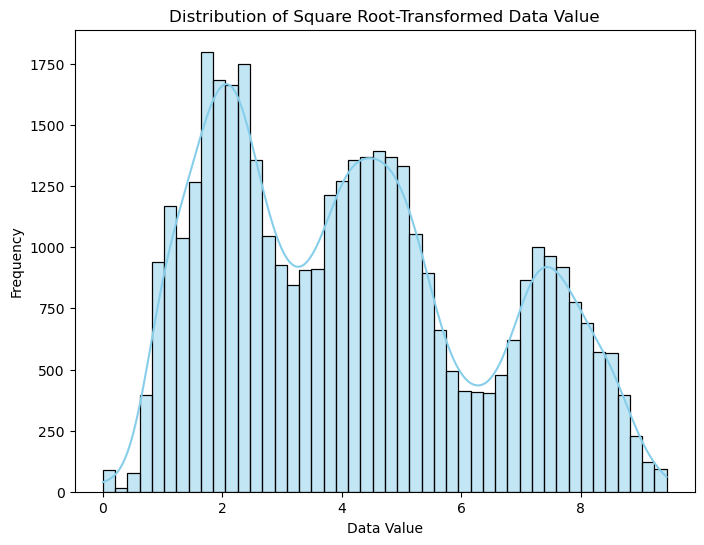

In [167]:
import numpy as np

# Apply square root transformation to 'Data_Value' column
cleaned_data_no_outliers.loc[:, 'Data_Value'] = np.sqrt(cleaned_data_no_outliers['Data_Value'])

# Plot the distribution of the square root-transformed data
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data_no_outliers['Data_Value'], kde=True, color='skyblue')
plt.title('Distribution of Square Root-Transformed Data Value')
plt.xlabel('Data Value')
plt.ylabel('Frequency')
plt.show()


In [168]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis
data_skewness = skew(cleaned_data_no_outliers.loc[:, 'Data_Value'])
data_kurtosis = kurtosis(cleaned_data_no_outliers.loc[:, 'Data_Value'])

print("Skewness:", data_skewness)
print("Kurtosis:", data_kurtosis)

Skewness: 0.37978656618814843
Kurtosis: -0.9502649127864258


In [169]:
# save data as 'cleaned_data1.csv'
cleaned_data_no_outliers.to_csv('cleaned_data1.csv', index=False)
cleaned_data_no_outliers.round(1).head(5)

,YEAR,LocationDesc,TopicType,TopicDesc,MeasureDesc,Data_Value,Sample_Size,Gender,Race,Age,Education,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,DisplayOrder
0,2017,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,5.5,692.0,Male,All Races,All Ages,All Grades,2.3,25.4,34.6,21
3,2016,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,0.7,123.0,Female,Hispanic,All Ages,All Grades,0.4,0.0,1.2,69
4,2014,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,4.7,209.0,Male,White,All Ages,All Grades,4.9,12.4,31.4,22
5,2012,Indiana,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,4.6,5165.0,Male,All Races,All Ages,All Grades,0.8,20.0,23.2,21
6,2019,Delaware,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use – (2 yrs – Race/Ethnicity),1.7,5978.0,Male,White,All Ages,All Grades,0.3,2.2,3.4,77


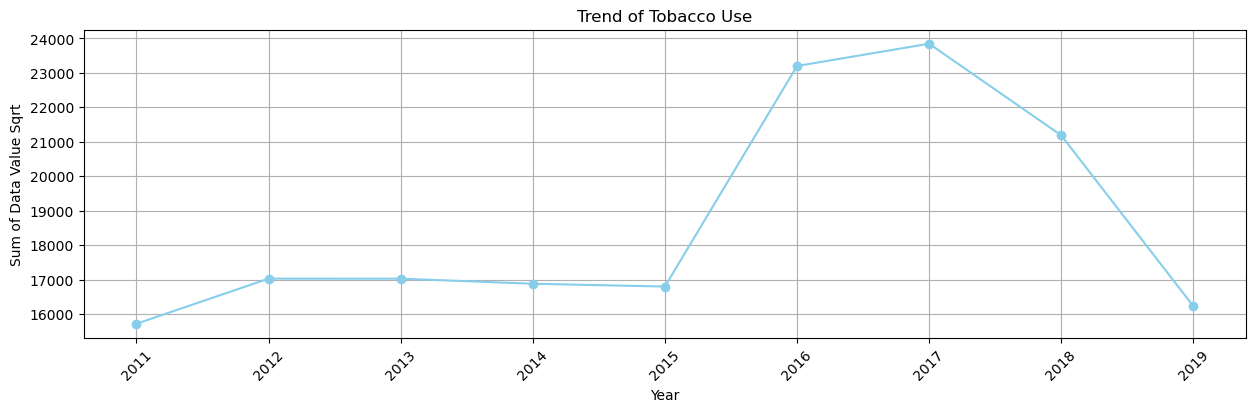

In [170]:
import matplotlib.pyplot as plt

# Group the data by year and get the sum Data_Value_Sqrt for each year
yearly_data = cleaned_data_no_outliers.groupby('YEAR')['Data_Value'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(15, 4))
plt.plot(yearly_data['YEAR'], yearly_data['Data_Value'], marker='o', color='skyblue')
plt.title('Trend of Tobacco Use')
plt.xlabel('Year')
plt.ylabel('Sum of Data Value Sqrt')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


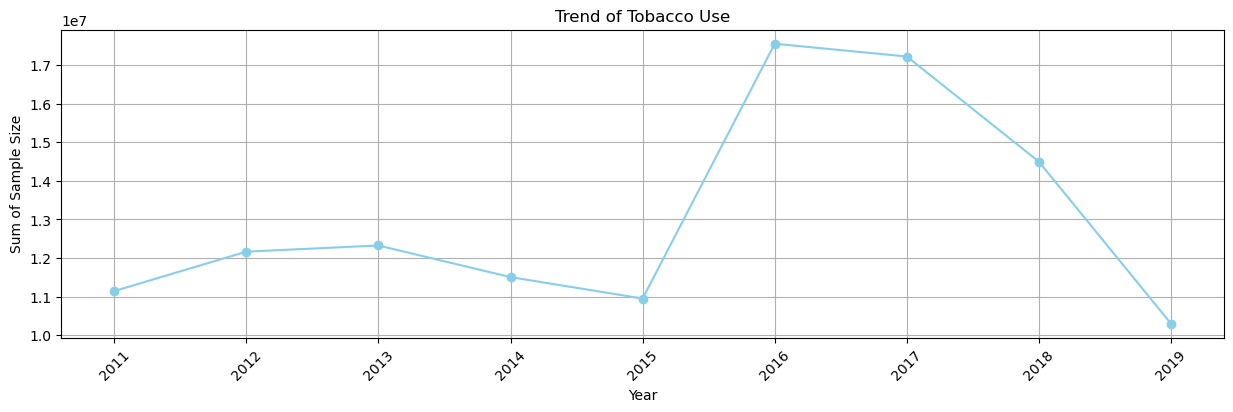

In [171]:
import matplotlib.pyplot as plt

# Group the data by year and get the sum Data_Value_Sqrt for each year
yearly_data = cleaned_data_no_outliers.groupby('YEAR')['Sample_Size'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(15, 4))
plt.plot(yearly_data['YEAR'], yearly_data['Sample_Size'], marker='o', color='skyblue')
plt.title('Trend of Tobacco Use')
plt.xlabel('Year')
plt.ylabel('Sum of Sample Size')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


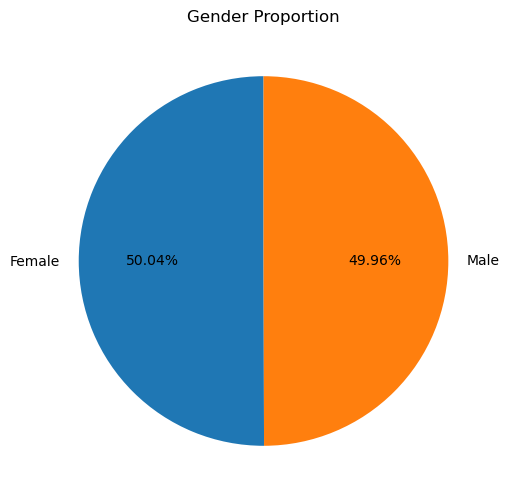

In [172]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate the data by gender and sum the 'Data_Value' column for each gender
gender_sum = cleaned_data_no_outliers.groupby('Gender')['Data_Value'].sum()

# Create a pie chart to visualize gender proportion using the sum of Data_Value
plt.figure(figsize=(8, 6))
plt.pie(gender_sum, labels=gender_sum.index, autopct='%1.2f%%', startangle=90)
plt.title('Gender Proportion')
plt.show()


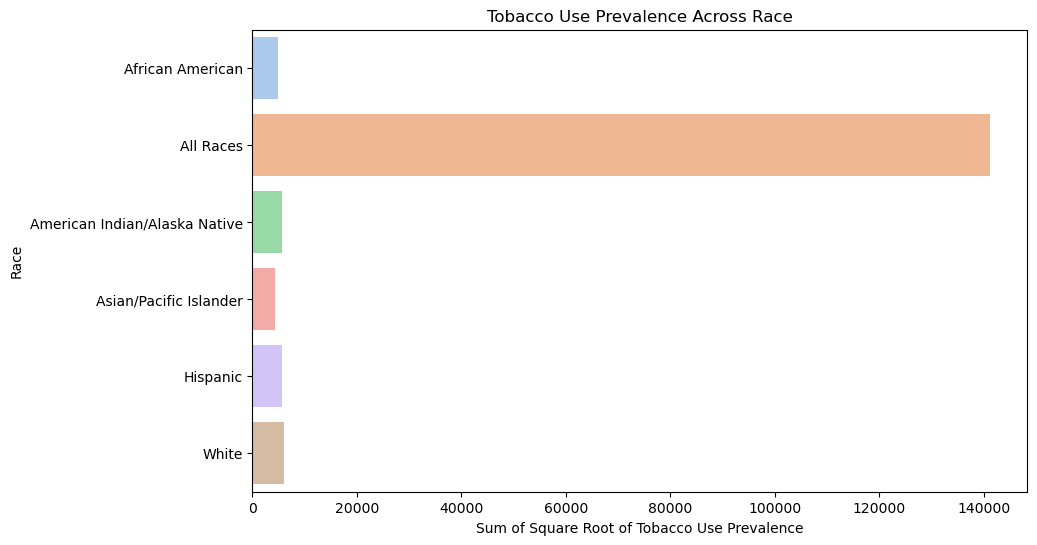

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the sum of the square root of tobacco use prevalence across race
tobacco_use_sqrt = cleaned_data_no_outliers.groupby('Race')['Data_Value'].sum().reset_index()

# Create a bar plot to visualize tobacco use prevalence across race using a built-in palette
plt.figure(figsize=(10, 6))  
sns.barplot(x='Data_Value', y='Race', data=tobacco_use_sqrt, hue='Race', palette='pastel', legend=False)
plt.title('Tobacco Use Prevalence Across Race')
plt.xlabel('Sum of Square Root of Tobacco Use Prevalence')
plt.ylabel('Race')
plt.xticks(rotation=0)
plt.show()


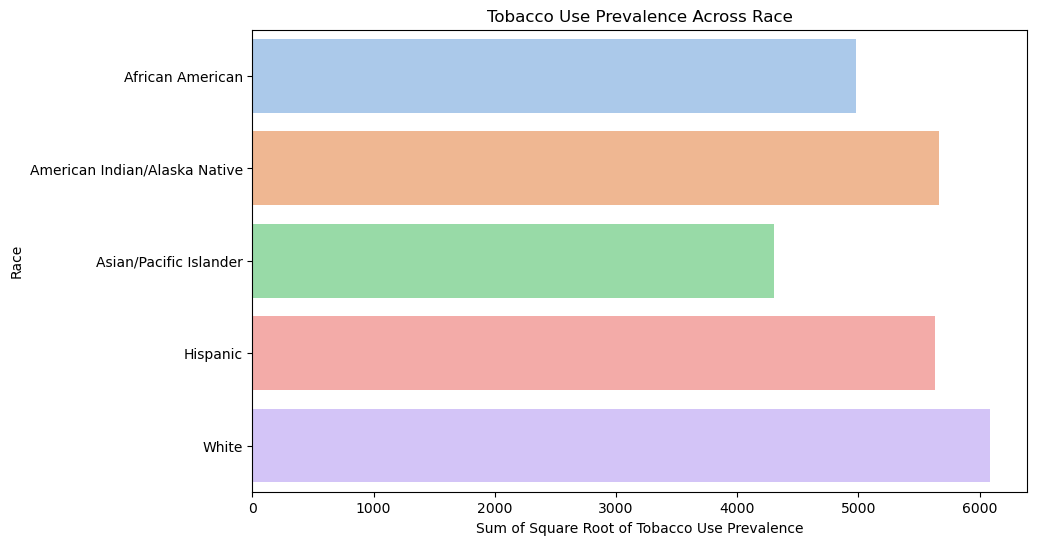

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the sum of the square root of tobacco use prevalence across race
tobacco_use_sqrt = tobacco_use_sqrt[tobacco_use_sqrt['Race'] != 'All Races']

# Create a bar plot to visualize tobacco use prevalence across race using a built-in palette
plt.figure(figsize=(10, 6))  
sns.barplot(x='Data_Value', y='Race', data=tobacco_use_sqrt, hue='Race', palette='pastel', legend=False)
plt.title('Tobacco Use Prevalence Across Race')
plt.xlabel('Sum of Square Root of Tobacco Use Prevalence')
plt.ylabel('Race')
plt.xticks(rotation=0)
plt.show()


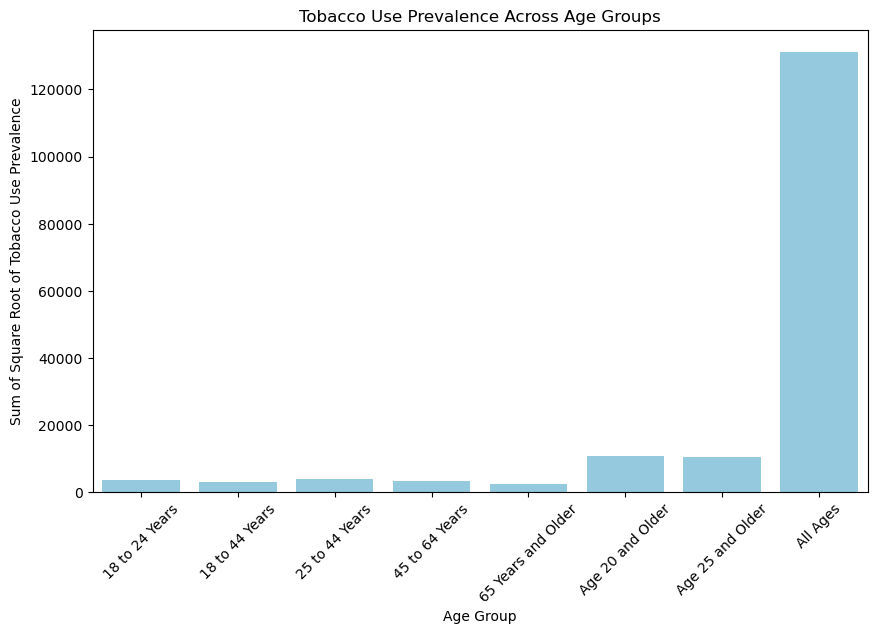

In [175]:
# Calculate the sum of the square root of 'Data_Value' across age groups
sqrt_data_value_by_age = cleaned_data_no_outliers.groupby('Age')['Data_Value'].sum().reset_index()

# Create a bar plot to visualize the mean of the square root of 'Data_Value' across age groups
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Data_Value', data=sqrt_data_value_by_age, color='skyblue')
plt.title('Tobacco Use Prevalence Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Sum of Square Root of Tobacco Use Prevalence')
plt.xticks(rotation=45)
plt.show()


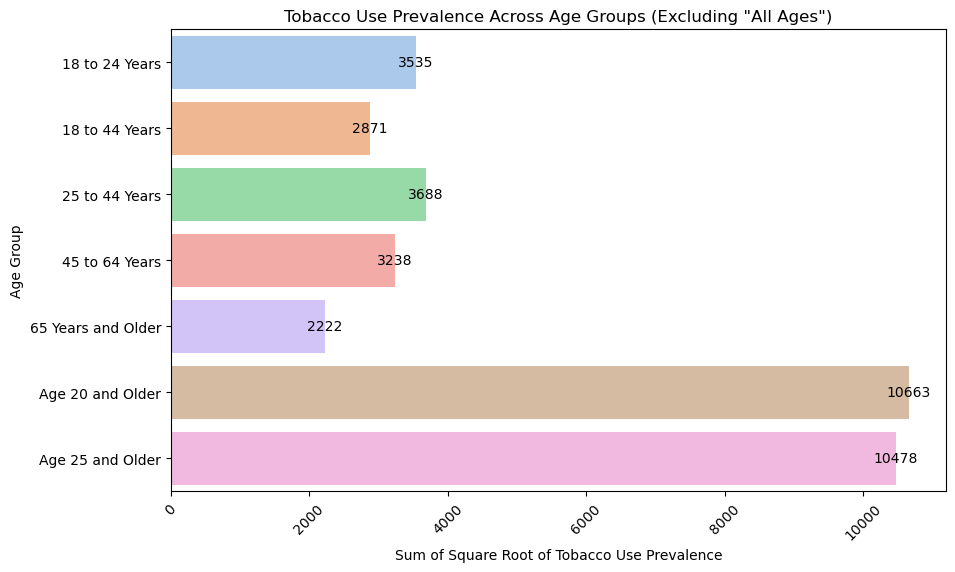

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to exclude the "All Ages" category
sqrt_data_value_by_age_filtered = sqrt_data_value_by_age[sqrt_data_value_by_age['Age'] != 'All Ages']

# Define custom colors for the bars
custom_colors = sns.color_palette('pastel')[:len(sqrt_data_value_by_age_filtered)]

# Create a bar plot to visualize the mean of the square root of 'Data_Value' across age groups (excluding "All Ages")
plt.figure(figsize=(10, 6))
sns.barplot(x='Data_Value', y='Age', data=sqrt_data_value_by_age_filtered, hue='Age', palette=custom_colors, dodge=False)
plt.title('Tobacco Use Prevalence Across Age Groups (Excluding "All Ages")')
plt.xlabel('Sum of Square Root of Tobacco Use Prevalence')
plt.ylabel('Age Group')
plt.xticks(rotation=45)

# Add percentage representation to the bars
for index, row in sqrt_data_value_by_age_filtered.iterrows():
    plt.text(row['Data_Value'], index, f"{row['Data_Value']:.0f}", color='black', ha="center", va="center")

plt.show()


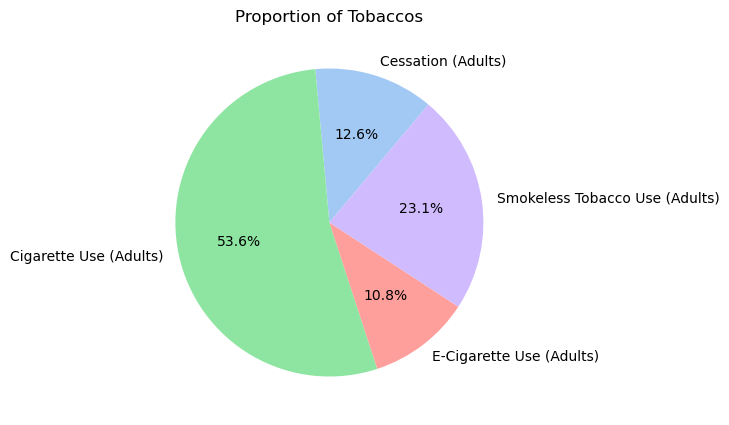

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each topic
sqrt_data_value_by_topic = cleaned_data_no_outliers.groupby('TopicDesc')['Data_Value'].sum()


# Plot the topic distribution as a pie chart
plt.figure(figsize=(5, 5))
plt.pie(sqrt_data_value_by_topic, labels=sqrt_data_value_by_topic.index, autopct='%1.1f%%', 
        colors=sns.color_palette('pastel6', len(sqrt_data_value_by_topic)), startangle=50)
plt.title('Proportion of Tobaccos')
plt.show()

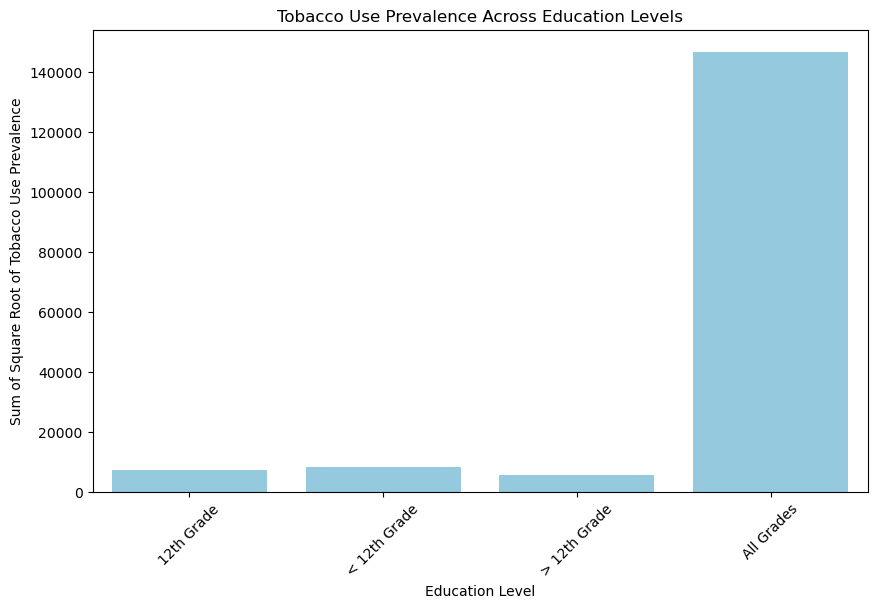

In [178]:
# Calculate the mean of the square root of 'Data_Value' across education levels
sqrt_data_value_by_education = cleaned_data_no_outliers.groupby('Education')['Data_Value'].sum().reset_index()

# Create a bar plot to visualize the mean of the square root of 'Data_Value' across education levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Data_Value', data=sqrt_data_value_by_education, color='skyblue')
plt.title('Tobacco Use Prevalence Across Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Sum of Square Root of Tobacco Use Prevalence')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

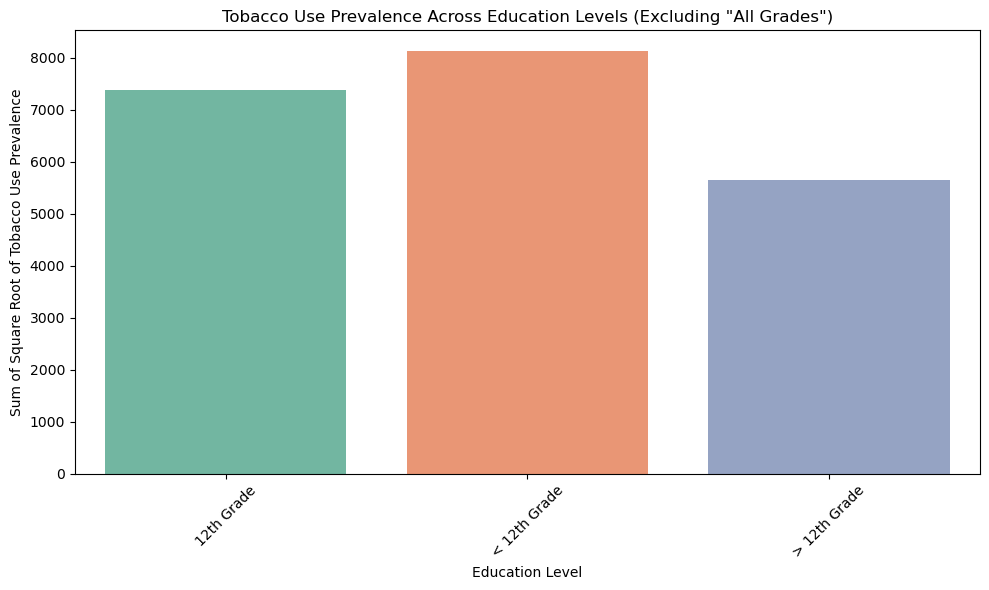

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to exclude the "All Grades" category
filtered_data = sqrt_data_value_by_education[sqrt_data_value_by_education['Education'] != 'All Grades']

# Create a bar plot to visualize the sum of the square root of 'Data_Value' across education levels
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Data_Value', hue='Education', data=filtered_data, palette='Set2', legend=False)
plt.title('Tobacco Use Prevalence Across Education Levels (Excluding "All Grades")')
plt.xlabel('Education Level')
plt.ylabel('Sum of Square Root of Tobacco Use Prevalence')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent cropping of labels
plt.show()


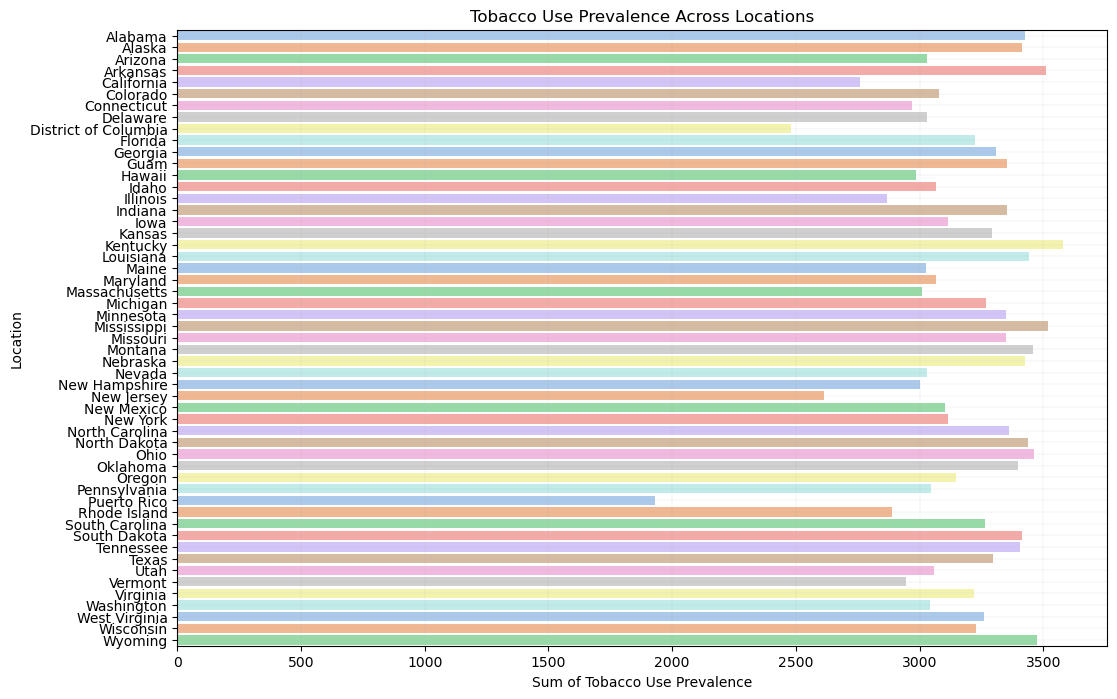

In [180]:
import seaborn as sns

# Calculate the sum of the square root of 'Data_Value' across locations
sum_sqrt_data_value_by_location = cleaned_data_no_outliers.groupby('LocationDesc')['Data_Value'].sum().reset_index()

# Define custom colors using a larger palette
custom_colors = sns.color_palette('pastel', n_colors=len(sum_sqrt_data_value_by_location))

# Create a horizontal bar plot to visualize the sum of the square root of 'Data_Value' across locations
plt.figure(figsize=(12, 8))
sns.barplot(x='Data_Value', y='LocationDesc', data=sum_sqrt_data_value_by_location, hue='LocationDesc', palette=custom_colors, orient='h', legend=False)
plt.title('Tobacco Use Prevalence Across Locations')
plt.xlabel('Sum of Tobacco Use Prevalence')
plt.ylabel('Location')
plt.grid(True, linewidth=0.10)
plt.show()


In [181]:
# Select relevant columns/features
model_df = cleaned_data.copy()


model_df.head(3)

,YEAR,LocationDesc,TopicType,TopicDesc,MeasureDesc,Data_Value,Sample_Size,Gender,Race,Age,Education,Data_Value_Std_Err,Low_Confidence_Limit,High_Confidence_Limit,DisplayOrder
0,2017,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,30.0,692.0,Male,All Races,All Ages,All Grades,2.3,25.4,34.6,21
3,2016,Guam,Tobacco Use – Survey Data,Smokeless Tobacco Use (Adults),Current Use,0.5,123.0,Female,Hispanic,All Ages,All Grades,0.4,0.0,1.2,69
4,2014,Guam,Tobacco Use – Survey Data,Cigarette Use (Adults),Current Smoking,21.9,209.0,Male,White,All Ages,All Grades,4.9,12.4,31.4,22


In [182]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR  

# Assuming you have your features in X and target variable in y
X = cleaned_data.drop(columns=['Data_Value', 'LocationDesc', 'TopicType',  
                               'YEAR']) # Features
y = cleaned_data['Data_Value']  # Target variable

# Define column transformer for preprocessing
numeric_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Scale numerical features
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode categorical features
    ])

# Define SVR pipeline
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR())  # Initialize SVR regressor
])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVR model
svr_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = svr_pipeline.predict(X_test)


In [183]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)

Mean Squared Error: 1.1709353702778824
Mean Absolute Error: 0.1649525018287286
Root Mean Squared Error: 1.0820976713207928
R-squared: 0.9980557328055945
